## Exercise 1

Using regular expressions, extract all names from the dataset `yob2012.txt` (including the number of newborns registered in 2012 with their names and sex), which start with letters A to C. How many names did you find?

In [9]:
import re
pattern = re.compile(r'[ABC][a-zA-Z]*,[MF],\d+', re.MULTILINE)
with open('yob2012.txt', 'r') as file:
    data = file.read()
matches = re.findall(pattern, data)
print(f"Number of names starting with A-C: {len(matches)}")

Number of names starting with A-C: 7606


## Exercise 2

1. Write a generator function that generates prime numbers infinitely.
2. Write a generator function that generates a sequence of powers of a given base up to a given exponent. Then pipelining with generator double function which double the sequence from previous generator.

In [16]:
#1
def prime():
    num = 2
    while True:
        for i in range(2, num):
            if num % i == 0:
                break
        else:
            yield num
        num += 1
for i in prime():
    if i < 100:
        print(i)
    else:
        break

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


In [20]:
def power(base, exp):
    for i in range(exp+1):
        yield base ** i
def double(sequence):
    for item in sequence:
        yield item ** 2
for i in double(power(2, 5)):
    print(i)


1
4
16
64
256
1024


## Exercise 3

Given a data `uoe_tweets_07022019`, let do the following tasks:
1. Remove the `screen_name` and `created_at` columns.
2. It would be interesting to see how frequently the university has made posts. Can you group all posts according to their date of publication and then create a plot through time of how many posts have been made each day. </br>
You can use the `DataFrame.groupby()` method to find occurrences. Don't forget to label the axis of your plot. </br>
You can transfrom a `DataFrame.groupby()` object back into a DataFrame by using its `.count()` method
3. We would like to identify the 10 most favourited posts. This can easily be done using the [`nlargest`](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.nlargest.html) method and then simply indexing into the original dataframe. </br>
Find the 10 most popular posts, print them and see what they are about. </br>
You might want to use the `.iloc` method to index into the original data

In [ ]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('uoe_tweets_07022019.csv')
df.drop(columns=[df.columns[0]], inplace=True)
df.drop(columns=[df.columns[0],"screen_name", "created_at"])

,retweet_count,favorite_count
0,1,0
1,18,30
2,13,38
3,3,4
4,10,19
...,...,...
3208,9,4
3209,3,0
3210,2,1
3211,8,5


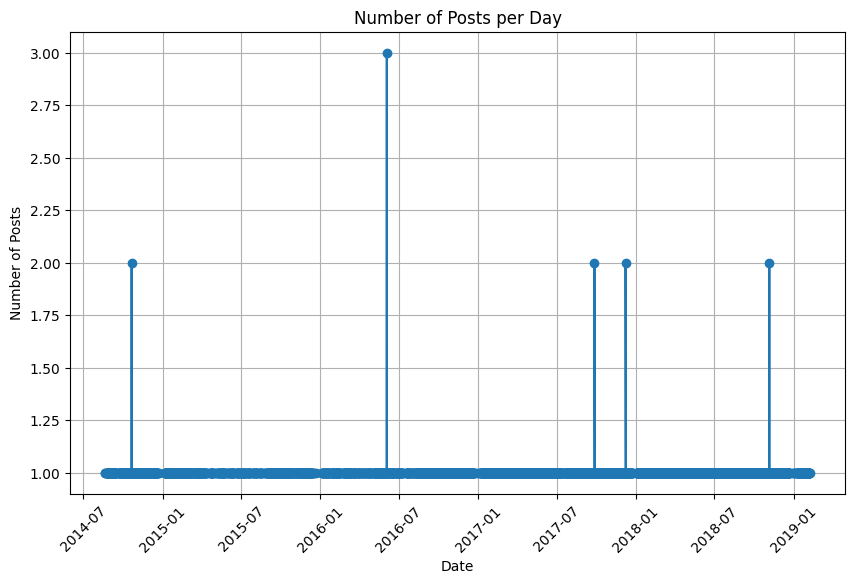

In [ ]:
#2
df["created_at"] = pd.to_datetime(df["created_at"])
frequency = df.groupby('created_at').size().reset_index(name='counts')

plt.figure(figsize=(10, 6))
plt.plot(frequency['created_at'], frequency['counts'], marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
#3
print(frequency.nlargest(10, 'counts'))
#print(df.iloc[frequency.nlargest(10, 'counts').index])

              created_at  counts
913  2016-06-02 16:08:00       3
107  2014-10-20 14:12:13       2
1949 2017-09-26 13:30:02       2
2142 2017-12-07 16:00:21       2
3016 2018-11-05 15:18:36       2
0    2014-08-20 13:03:11       1
1    2014-08-20 14:18:03       1
2    2014-08-22 13:39:00       1
3    2014-08-23 18:55:05       1
4    2014-08-24 17:50:15       1
